In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

file_path = '/content/drive/MyDrive/Indian_Kids_Screen_Time.csv'
df = pd.read_csv(file_path)

df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [6]:
df.describe(include='all')

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
count,9712.000000,9712,9712.000000,9712,9712,9712.000000,6494,9712
unique,NaN,2,NaN,4,2,NaN,15,2
top,NaN,Male,NaN,Smartphone,True,NaN,Poor Sleep,Urban
freq,NaN,4942,NaN,4568,8301,NaN,2268,6851
mean,12.979201,NaN,4.352837,NaN,NaN,0.427226,NaN,NaN
std,3.162437,NaN,1.718232,NaN,NaN,0.073221,NaN,NaN
min,8.000000,NaN,0.000000,NaN,NaN,0.300000,NaN,NaN
25%,10.000000,NaN,3.410000,NaN,NaN,0.370000,NaN,NaN
50%,13.000000,NaN,4.440000,NaN,NaN,0.430000,NaN,NaN
75%,16.000000,NaN,5.380000,NaN,NaN,0.480000,NaN,NaN


In [7]:
df.isnull().sum()

,0
Age,0
Gender,0
Avg_Daily_Screen_Time_hr,0
Primary_Device,0
Exceeded_Recommended_Limit,0
Educational_to_Recreational_Ratio,0
Health_Impacts,3218
Urban_or_Rural,0


In [8]:
df.shape

(9712, 8)

In [9]:
df.duplicated().sum()

np.int64(44)

In [10]:
df['Health_Impacts'].fillna(df['Health_Impacts'].mode()[0], inplace=True)

/tmp/ipython-input-2753750671.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Health_Impacts'].fillna(df['Health_Impacts'].mode()[0], inplace=True)


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.dtypes

,0
Age,int64
Gender,object
Avg_Daily_Screen_Time_hr,float64
Primary_Device,object
Exceeded_Recommended_Limit,bool
Educational_to_Recreational_Ratio,float64
Health_Impacts,object
Urban_or_Rural,object


In [14]:
df['Avg_Daily_Screen_Time_hr'] = df['Avg_Daily_Screen_Time_hr'].astype(float)

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = ['Gender', 'Primary_Device', 'Exceeded_Recommended_Limit',
                    'Urban_or_Rural', 'Health_Impacts']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [16]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9665 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9665 non-null   int64  
 1   Gender                             9665 non-null   int64  
 2   Avg_Daily_Screen_Time_hr           9665 non-null   float64
 3   Primary_Device                     9665 non-null   int64  
 4   Exceeded_Recommended_Limit         9665 non-null   int64  
 5   Educational_to_Recreational_Ratio  9665 non-null   float64
 6   Health_Impacts                     9665 non-null   int64  
 7   Urban_or_Rural                     9665 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 679.6 KB


In [17]:
# Convert numeric encodings back to readable labels

df['Gender'] = df['Gender'].map({0: 'Male', 1: 'Female'})
df['Primary_Device'] = df['Primary_Device'].map({0: 'Mobile', 1: 'Tablet', 2: 'Laptop', 3: 'TV'})
df['Exceeded_Recommended_Limit'] = df['Exceeded_Recommended_Limit'].map({0: 'No', 1: 'Yes'})
df['Health_Impacts'] = df['Health_Impacts'].map({0: 'Low', 1: 'Moderate', 2: 'High'})
df['Urban_or_Rural'] = df['Urban_or_Rural'].map({0: 'Urban', 1: 'Rural'})

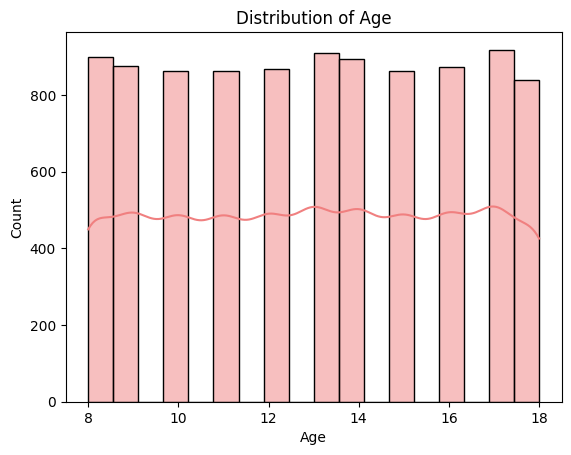

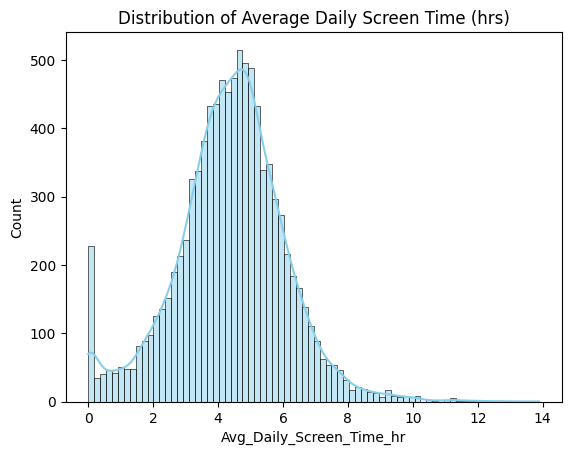

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age Distribution
sns.histplot(df['Age'], kde=True, color='lightcoral')
plt.title("Distribution of Age")
plt.show()

# Screen Time Distribution
sns.histplot(df['Avg_Daily_Screen_Time_hr'], kde=True, color='skyblue')
plt.title("Distribution of Average Daily Screen Time (hrs)")
plt.show()

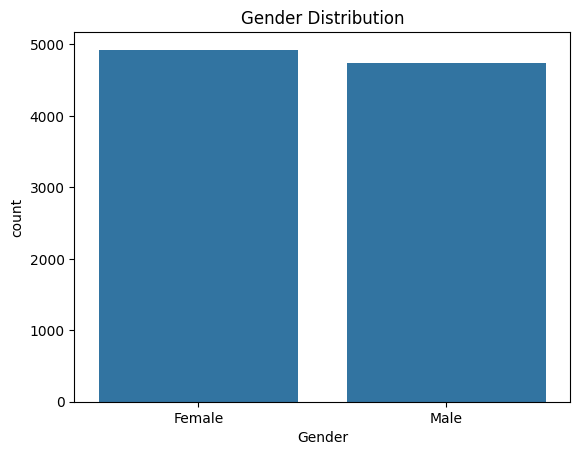

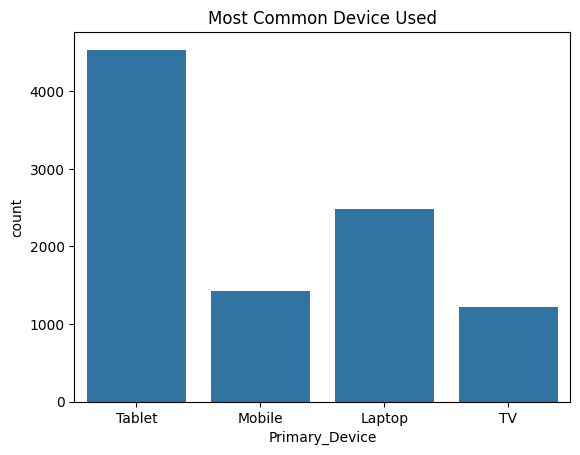

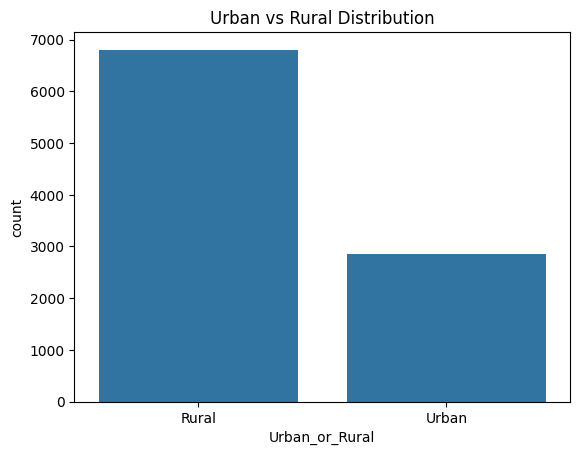

In [19]:
# Gender
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

# Device Type
sns.countplot(x='Primary_Device', data=df)
plt.title("Most Common Device Used")
plt.show()

# Location
sns.countplot(x='Urban_or_Rural', data=df)
plt.title("Urban vs Rural Distribution")
plt.show()

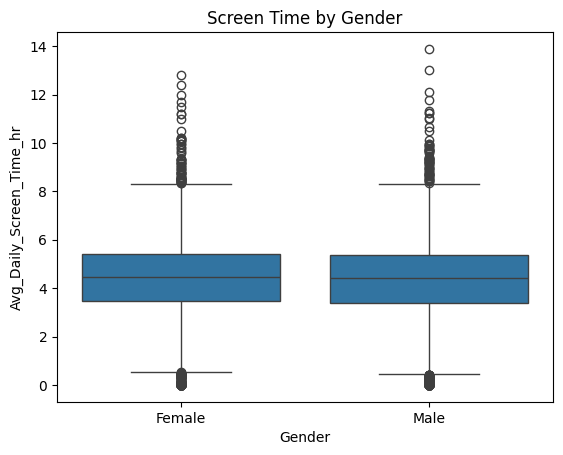

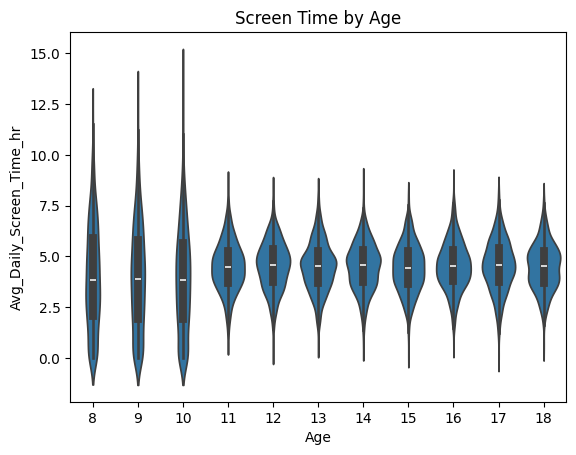

In [20]:
# Boxplot: Screen Time vs Gender
sns.boxplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title("Screen Time by Gender")
plt.show()

# Violin plot: Screen Time vs Age
sns.violinplot(x='Age', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title("Screen Time by Age")
plt.show()

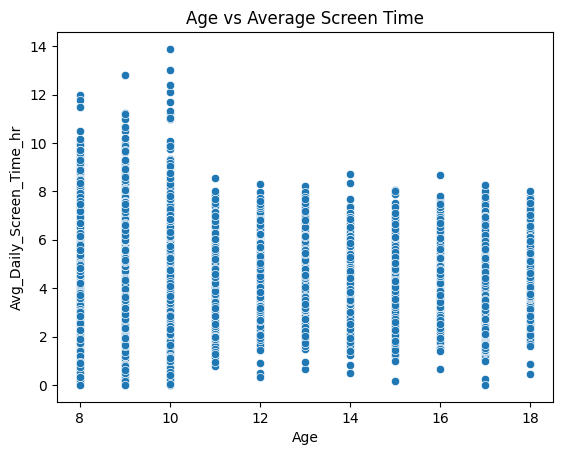

In [21]:
sns.scatterplot(x='Age', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title("Age vs Average Screen Time")
plt.show()

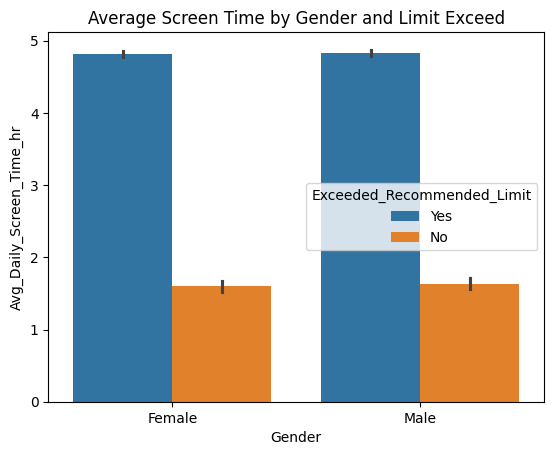

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example grouped barplot
sns.barplot(x='Gender', y='Avg_Daily_Screen_Time_hr', hue='Exceeded_Recommended_Limit', data=df)
plt.title("Average Screen Time by Gender and Limit Exceed")
plt.show()

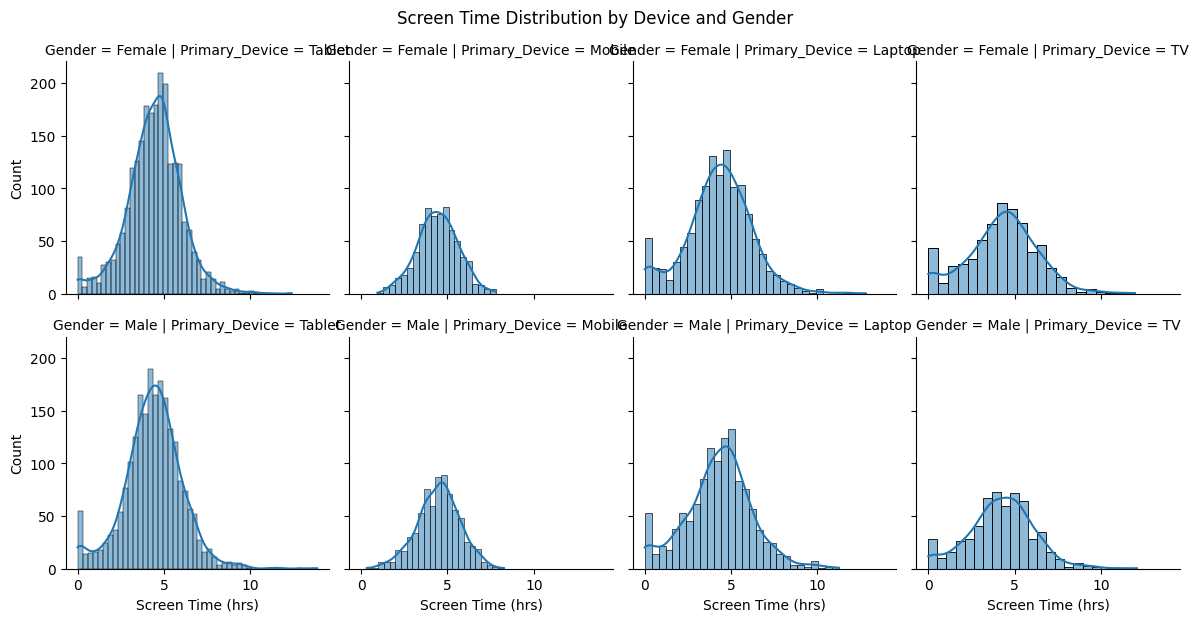

In [23]:
g = sns.FacetGrid(df, col="Primary_Device", row="Gender", height=3)
g.map_dataframe(sns.histplot, x="Avg_Daily_Screen_Time_hr", kde=True)
g.set_axis_labels("Screen Time (hrs)", "Count")
plt.suptitle("Screen Time Distribution by Device and Gender", y=1.03)
plt.show()

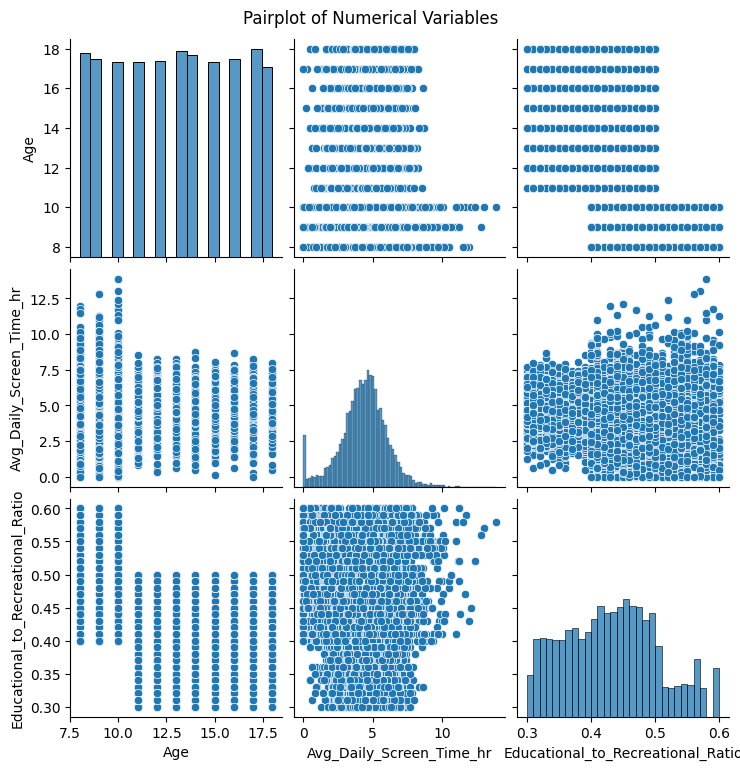

In [24]:
sns.pairplot(df[['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio']])
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()

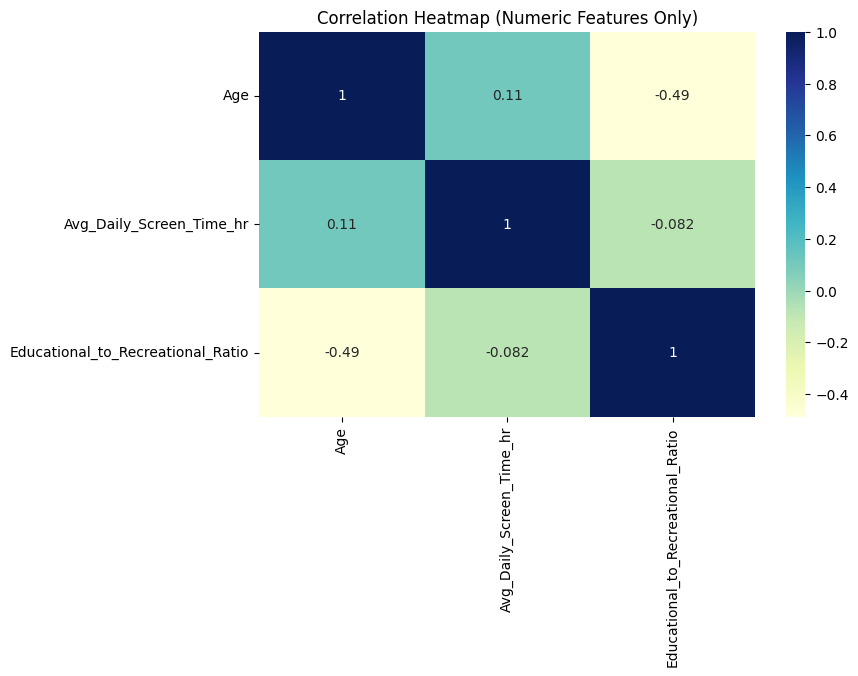

In [25]:
plt.figure(figsize=(8,5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

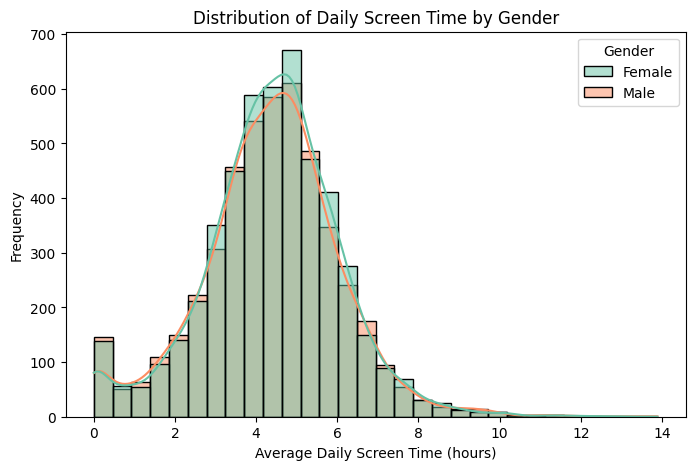

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x='Avg_Daily_Screen_Time_hr',
    hue='Gender',
    kde=True,
    bins=30,
    palette='Set2'
)

plt.title("Distribution of Daily Screen Time by Gender")
plt.xlabel("Average Daily Screen Time (hours)")
plt.ylabel("Frequency")
plt.show()

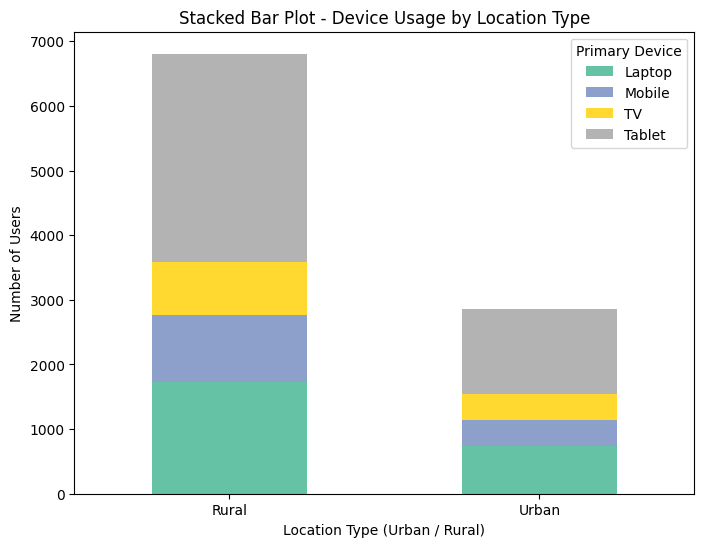

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a grouped summary
device_location = df.groupby(['Urban_or_Rural', 'Primary_Device']).size().unstack(fill_value=0)

# Step 2: Plot stacked bar chart
device_location.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Set2')

# Step 3: Add labels and title
plt.title("Stacked Bar Plot - Device Usage by Location Type")
plt.xlabel("Location Type (Urban / Rural)")
plt.ylabel("Number of Users")
plt.legend(title="Primary Device")
plt.xticks(rotation=0)
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 46.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 43.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


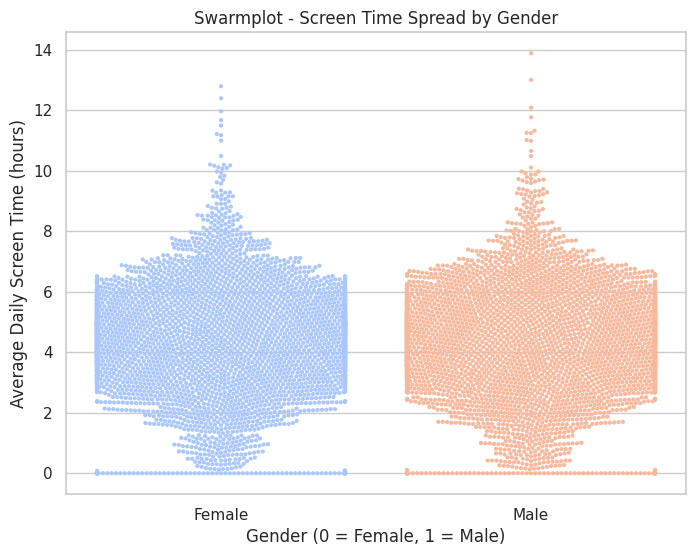

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Swarmplot showing screen time spread by gender
plt.figure(figsize=(8,6))
sns.swarmplot(x='Gender',
              y='Avg_Daily_Screen_Time_hr',
              hue='Gender',
              data=df,
              palette='coolwarm',
              size=3,
              legend=False)

plt.title("Swarmplot - Screen Time Spread by Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Average Daily Screen Time (hours)")
plt.show()

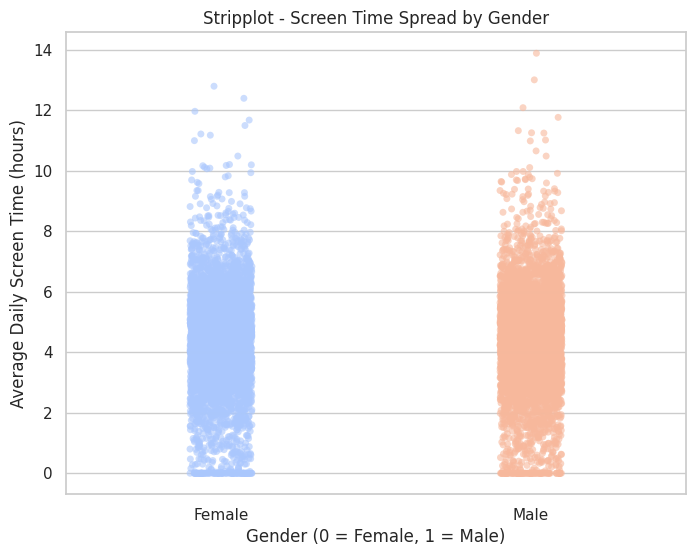

In [30]:
plt.figure(figsize=(8,6))
sns.stripplot(x='Gender',
              y='Avg_Daily_Screen_Time_hr',
              hue='Gender',
              data=df,
              palette='coolwarm',
              jitter=True,
              alpha=0.6,
              legend=False)

plt.title("Stripplot - Screen Time Spread by Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Average Daily Screen Time (hours)")
plt.show()

/tmp/ipython-input-2163738906.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')
/tmp/ipython-input-2163738906.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=df, palette='coolwarm')


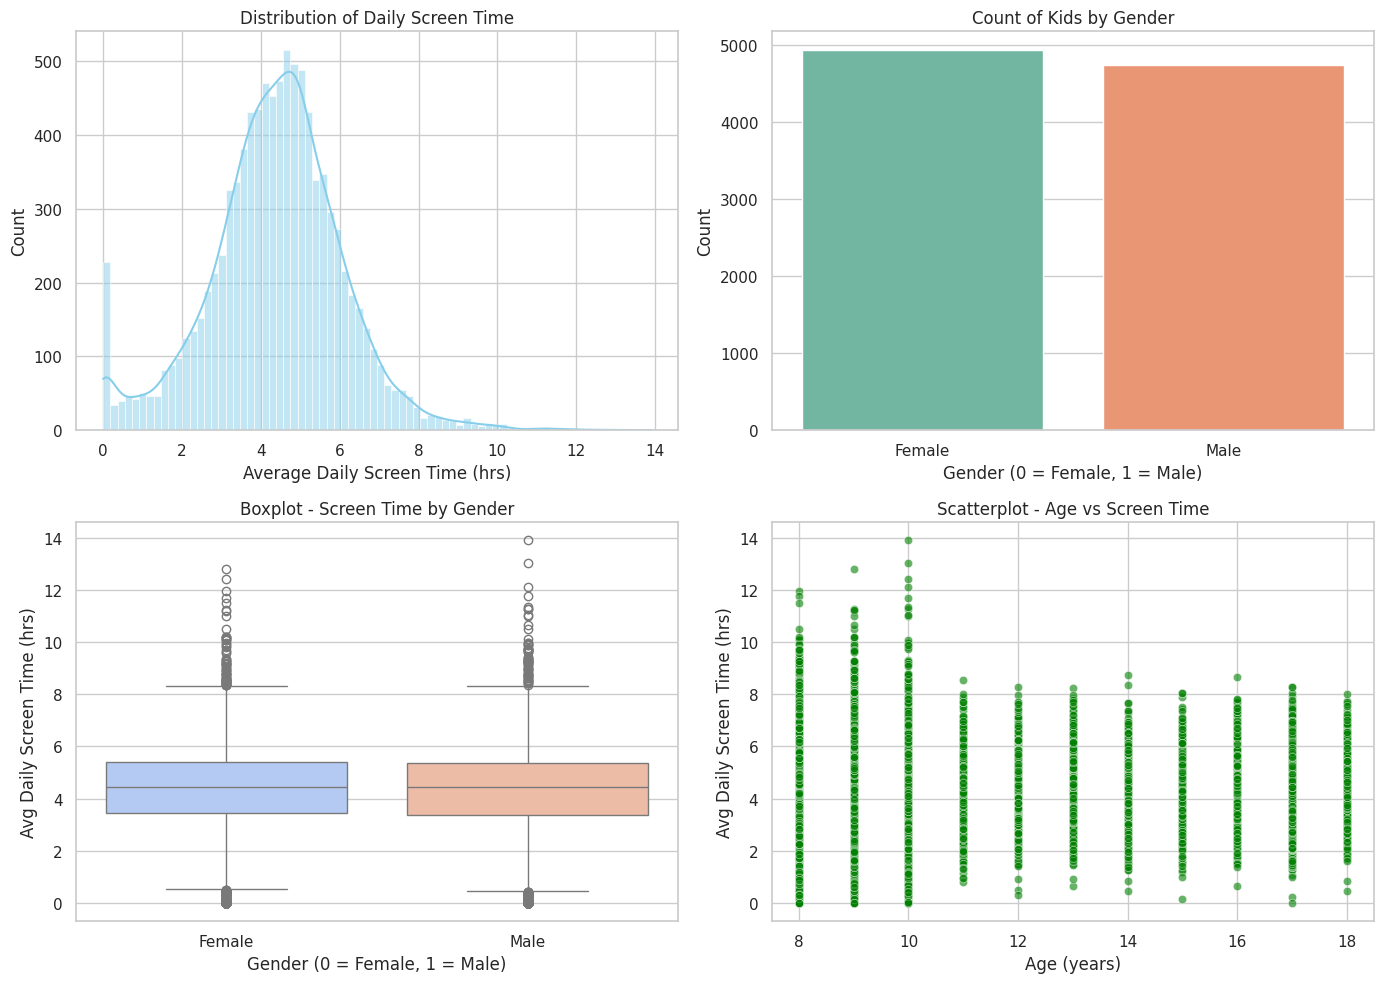

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the canvas
plt.figure(figsize=(14,10))

# 1️⃣ Histogram of Screen Time
plt.subplot(2,2,1)
sns.histplot(df['Avg_Daily_Screen_Time_hr'], kde=True, color='skyblue')
plt.title("Distribution of Daily Screen Time")
plt.xlabel("Average Daily Screen Time (hrs)")
plt.ylabel("Count")

# 2️⃣ Countplot of Gender
plt.subplot(2,2,2)
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title("Count of Kids by Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count")

# 3️⃣ Boxplot of Screen Time by Gender
plt.subplot(2,2,3)
sns.boxplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=df, palette='coolwarm')
plt.title("Boxplot - Screen Time by Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Avg Daily Screen Time (hrs)")

# 4️⃣ Scatterplot of Age vs Screen Time
plt.subplot(2,2,4)
sns.scatterplot(x='Age', y='Avg_Daily_Screen_Time_hr', data=df, color='green', alpha=0.6)
plt.title("Scatterplot - Age vs Screen Time")
plt.xlabel("Age (years)")
plt.ylabel("Avg Daily Screen Time (hrs)")

# Adjust layout
plt.tight_layout()
plt.show()